In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("/content/ion.csv" )
df.drop(columns = ["Unnamed: 0"], inplace = True)

df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,0
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,0
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,0
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,0


In [29]:
# Split the dataset into features and labels
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X.shape, y.shape

((351, 34), (351,))

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((245, 34), (106, 34), (245,), (106,))

In [31]:
max_ks = 0.5*pow(X_train.shape[0],0.5)
max_ks

7.826237921249264

Our values of Ks will go level higher than the optimal max Ks allowed above

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# store classifiers
clfs = []
k_vals = [1, 2, 5, 10, 20, 30]

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    clfs.append(knn)

# Evaluate each classifier on the test set and store the results
results = []
accs = []
for i, clf in enumerate(clfs):
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append((i, clf.get_params()['n_neighbors'], report))
    accs.append(clf.score(X_test, y_test))
    
results

[(0,
  1,
  {'0': {'precision': 0.8125,
    'recall': 0.9701492537313433,
    'f1-score': 0.8843537414965987,
    'support': 67},
   '1': {'precision': 0.9230769230769231,
    'recall': 0.6153846153846154,
    'f1-score': 0.7384615384615384,
    'support': 39},
   'accuracy': 0.839622641509434,
   'macro avg': {'precision': 0.8677884615384616,
    'recall': 0.7927669345579793,
    'f1-score': 0.8114076399790686,
    'support': 106},
   'weighted avg': {'precision': 0.8531839622641509,
    'recall': 0.839622641509434,
    'f1-score': 0.8306764215120012,
    'support': 106}}),
 (1,
  2,
  {'0': {'precision': 0.7674418604651163,
    'recall': 0.9850746268656716,
    'f1-score': 0.8627450980392157,
    'support': 67},
   '1': {'precision': 0.95,
    'recall': 0.48717948717948717,
    'f1-score': 0.6440677966101694,
    'support': 39},
   'accuracy': 0.8018867924528302,
   'macro avg': {'precision': 0.8587209302325581,
    'recall': 0.7361270570225794,
    'f1-score': 0.7534064473246926,
  

In [33]:
new_X_sets = []
new_y_sets = []

for clf in clfs:
  y_preds = clf.predict(X_train)
  X_false = []
  y_false = []
  for i in range(len(y_preds == y_train)):
    X_false.append(X_train[i])
    y_false.append(y_train[i])

    if (y_preds == y_train)[i] == False:
      X_false.append(X_train[i])
      y_false.append(y_preds[i])

  new_X_sets.append(np.array(X_false))
  new_y_sets.append(np.array(y_false))

In [34]:
for el in new_X_sets:
  print(el.shape) 

(245, 34)
(276, 34)
(279, 34)
(293, 34)
(299, 34)
(310, 34)


In [35]:
clfs_new = []
k_vals = [1, 2, 5, 10, 20, 30]

for i in range(len(k_vals)):

    k = k_vals[i]
    X_train = new_X_sets[i]
    y_train = new_y_sets[i]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    clfs_new.append(knn)

# Evaluate each classifier on the test set and store the results
results_new = []
accs_new = []
for i, clf in enumerate(clfs_new):
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results_new.append((i, clf.get_params()['n_neighbors'], report))
    accs_new.append(clf.score(X_test, y_test))
 
results_new

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[(0,
  1,
  {'0': {'precision': 0.8125,
    'recall': 0.9701492537313433,
    'f1-score': 0.8843537414965987,
    'support': 67},
   '1': {'precision': 0.9230769230769231,
    'recall': 0.6153846153846154,
    'f1-score': 0.7384615384615384,
    'support': 39},
   'accuracy': 0.839622641509434,
   'macro avg': {'precision': 0.8677884615384616,
    'recall': 0.7927669345579793,
    'f1-score': 0.8114076399790686,
    'support': 106},
   'weighted avg': {'precision': 0.8531839622641509,
    'recall': 0.839622641509434,
    'f1-score': 0.8306764215120012,
    'support': 106}}),
 (1,
  2,
  {'0': {'precision': 0.7362637362637363,
    'recall': 1.0,
    'f1-score': 0.8481012658227849,
    'support': 67},
   '1': {'precision': 1.0,
    'recall': 0.38461538461538464,
    'f1-score': 0.5555555555555556,
    'support': 39},
   'accuracy': 0.7735849056603774,
   'macro avg': {'precision': 0.8681318681318682,
    'recall': 0.6923076923076923,
    'f1-score': 0.7018284106891702,
    'support': 106

In [36]:
accs

[0.839622641509434,
 0.8018867924528302,
 0.8584905660377359,
 0.839622641509434,
 0.7830188679245284,
 0.6792452830188679]

In [37]:
accs, accs_new

([0.839622641509434,
  0.8018867924528302,
  0.8584905660377359,
  0.839622641509434,
  0.7830188679245284,
  0.6792452830188679],
 [0.839622641509434,
  0.7735849056603774,
  0.8490566037735849,
  0.8490566037735849,
  0.7075471698113207,
  0.6320754716981132])

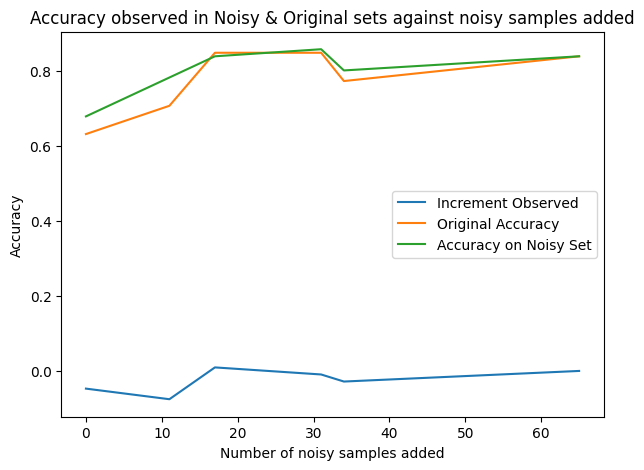

In [38]:
# plot Increment in Accuraccy with number of labels attached:

incre = np.array(accs_new) - np.array(accs)
new_labels =  [-el.shape[0] + X_train.shape[0] for el in new_X_sets]

plt.figure(figsize = (7,5))


plt.plot(new_labels, incre, label = "Increment Observed")
plt.plot(new_labels, accs_new, label = "Original Accuracy")
plt.plot(new_labels, accs, label = "Accuracy on Noisy Set")
plt.xlabel("Number of noisy samples added")
plt.ylabel("Accuracy")
plt.title("Accuracy observed in Noisy & Original sets against noisy samples added")
plt.legend()
plt.show()

In [39]:
el.shape[0]

310